# Vit Transformer

## Модель

In [1]:
import torch
from torch import nn

In [2]:
# Смоделируем данные

n_features = 10  # Количество признаков
n_classes = 3  # Количество классов
batch_size = 5 

data = torch.randn((batch_size, n_features))
print(data.shape)
print(data)

torch.Size([5, 10])
tensor([[ 0.5589,  0.0802,  0.3944,  0.0969, -1.2385,  0.5998, -0.6889, -0.5860,
          0.3113, -0.0137],
        [ 0.0202, -0.7358, -0.7950,  0.1727, -0.1478,  1.5512, -0.5337, -0.7009,
         -0.7723, -0.2491],
        [-0.0956,  0.6090, -0.9796,  1.0532,  1.8489, -0.2773, -0.3571, -0.8735,
          0.6746,  0.3242],
        [ 0.2130, -0.4064,  0.4562,  0.0692,  0.4672, -1.3482,  0.7206,  0.1788,
          0.1646, -0.4228],
        [-0.6793,  1.4267, -0.2582,  0.0930,  0.7736, -0.2133, -2.1203,  1.0483,
          1.1972,  0.4434]])


In [3]:
# Зададим простую модель
model = nn.Linear(n_features, n_classes)

In [4]:
# Применим модель к вектору
answer = model(data)
print(answer.shape)
print(answer)

torch.Size([5, 3])
tensor([[-0.2303, -0.3228, -0.4147],
        [-0.1225,  0.4043,  0.4657],
        [-0.3629,  0.2782,  0.4268],
        [-0.0831,  0.2372,  0.0211],
        [-0.4622, -0.0456, -0.2161]], grad_fn=<AddmmBackward0>)


In [5]:
# Модель как наследник nn.Module
class SimpleNN(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()

        self.lin = nn.Linear(n_features, n_classes)

    def forward(self, x):
        return self.lin(x)

In [6]:
# Попробуем применить модель в виде класса к данным
model = SimpleNN(n_features, n_classes)

answer = model(data)
print(answer.shape)
print(answer)

torch.Size([5, 3])
tensor([[-0.1275, -0.1295,  0.1917],
        [ 0.1864,  0.0651,  0.0036],
        [-0.0476,  0.8188, -0.1587],
        [ 0.4028, -0.7506, -0.1177],
        [ 0.0684,  1.0636, -1.1000]], grad_fn=<AddmmBackward0>)


In [7]:
from torchsummary import summary

model = SimpleNN(n_features, n_classes).cuda()

# 5, 10
input_size = (batch_size, n_features)
print(summary(model, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 5, 3]              33
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [8]:
# Модель как sequential
model = nn.Sequential(nn.Linear(n_features, n_classes))

answer = model(data)
print(answer.shape)
print(answer)

torch.Size([5, 3])
tensor([[-0.0452,  0.2694, -0.3855],
        [-0.0914,  0.4373, -0.8429],
        [ 0.5737,  0.5737,  0.4307],
        [ 0.0534,  0.2777,  0.0788],
        [ 0.7021,  0.0620,  1.0626]], grad_fn=<AddmmBackward0>)


In [9]:
# Модель как nn.ModuleList

model = nn.ModuleList([nn.Linear(n_features, n_classes)])

# answer = model(data)
# print(answer.shape)
# print(answer)

answer = model[0](data)
print(answer.shape)
print(answer)


torch.Size([5, 3])
tensor([[-0.4538, -0.3708, -0.0788],
        [-0.9524,  0.0063,  0.0382],
        [ 0.1445,  0.0192,  0.1958],
        [ 0.6490, -0.4464, -0.5139],
        [ 0.0891,  0.2724,  0.5520]], grad_fn=<AddmmBackward0>)


In [10]:
# Проверим параметры модели
class ParametersCheck(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()

        self.lin = nn.Linear(n_features, n_classes)
        self.seq = nn.Sequential(nn.Linear(n_features, n_classes))
        self.module_list = nn.ModuleList([nn.Linear(n_features, n_classes)])
        self.list_of_layers = [nn.Linear(n_features, n_classes)]
        self.param = nn.Parameter(torch.FloatTensor((1, 6, 7, 9)))


In [11]:
model = ParametersCheck(n_features, n_classes)

for i, param in enumerate(model.parameters()):
    print(f'Параметр #{i + 1}.')
    print(f'\t{param.shape}')

Параметр #1.
	torch.Size([4])
Параметр #2.
	torch.Size([3, 10])
Параметр #3.
	torch.Size([3])
Параметр #4.
	torch.Size([3, 10])
Параметр #5.
	torch.Size([3])
Параметр #6.
	torch.Size([3, 10])
Параметр #7.
	torch.Size([3])


Параметр #1 - тензор длtorch.FloatTensor((1, 6, 7, 9)), тензор размерности [4]
[nn.Linear(n_features, n_classes)] не выводится, поскольку .parameters() не может его распарсить
Параметр #2-3 - nn.ModuleList([nn.Linear(n_features, n_classes)]), линейный слой с тремя нейронами, каждый из которых имеет 10 входов. Поэтому у нас есть тензор [3, 10] (три нейрона по 10 весов каждый) и тензор [3] смещений каждого из трёх нейронов
То же самое касается Параметров #4-5 (nn.Sequential(nn.Linear(n_features, n_classes))) и Параметров #6-7 (nn.Linear(n_features, n_classes))


## ViT

![alt text](https://drive.google.com/uc?export=view&id=1J5TvycDPs8pzfvlXvtO5MCFBy64yp9Fa)

In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
# from einops import rearrange, reduce, repeat
# from einops.layers.torch import Rearrange, Reduce
# from torchsummary import summary

![](https://amaarora.github.io/images/vit-01.png)

## Часть 1. Patch Embedding, CLS Token, Position Encoding

![](https://amaarora.github.io/images/vit-02.png)

In [13]:
# input image `B, C, H, W`
x = torch.randn(1, 3, 224, 224)
# 2D conv
conv = nn.Conv2d(3, 768, 16, 16)
x = conv(x)
print(x.shape)
print(x.reshape(1, -1, 196).transpose(1, 2).shape)
print(x.reshape(1, -1, 768).shape)
print(x.reshape(1, 196, -1).shape)

# Не одно и то же
print(x.reshape(1, -1, 196).transpose(1, 2)[:, :5, :5])
print(x.reshape(1, -1, 768)[:, :5, :5])
print(x.reshape(1, 196, -1)[:, :5, :5])

x = x.reshape(1, -1, 196).transpose(1, 2)

torch.Size([1, 768, 14, 14])
torch.Size([1, 196, 768])
torch.Size([1, 196, 768])
torch.Size([1, 196, 768])
tensor([[[ 1.9820e-01,  3.5735e-02,  7.3878e-02,  1.2364e+00,  1.3674e+00],
         [-2.4284e-01, -2.5351e-01, -4.9248e-01,  2.9324e-01, -2.9278e-01],
         [-8.5247e-02,  6.6871e-01, -5.8609e-01,  5.7148e-02, -6.7786e-01],
         [-7.6983e-02, -1.7448e-01,  1.8261e-01,  8.7499e-01, -1.7342e+00],
         [-3.6403e-01,  1.0650e+00, -9.1690e-01, -1.5085e-03, -3.4499e-01]]],
       grad_fn=<SliceBackward0>)
tensor([[[ 0.1982, -0.2428, -0.0852, -0.0770, -0.3640],
         [ 0.0444, -0.7480,  0.1472, -0.9912,  0.6310],
         [-0.4030, -0.1425,  0.6838, -0.5301,  0.3148],
         [ 0.5554, -0.1558,  0.4384, -0.0945,  0.4003],
         [ 0.3640, -0.4141,  0.9624, -0.1521, -0.0746]]],
       grad_fn=<SliceBackward0>)
tensor([[[ 0.1982, -0.2428, -0.0852, -0.0770, -0.3640],
         [ 0.0444, -0.7480,  0.1472, -0.9912,  0.6310],
         [-0.4030, -0.1425,  0.6838, -0.5301,  0.31

Представленные выше операции не эквивалентны. Второй и третий случай дают одинаковый результат, поскольку в обоих случаях получается reshape(1, 196, 768). Но это не то же самое, что reshape(1, 768, 196).transpose(1, 2) (первый случай), поскольку тензоры в памяти хранятся по принципу C смежности (строка за строкой, расположенные последовательно друг за другом в виде длинной цепочки), и при формировании нового тензора в первую очередь будут задействованы значения, принадлежащие последней размерности (значения в строках). Другими словами, при переходе [1, 768, 14, 14] -> [1, 196, 768] новый тензор будет составляться из строчек, т.е. 14 строк будут будут проставлены друг за другом, и, поскольку это не равно требуемой размерности 768, будут подхвачены строки из следующей матрицы-канала (второго по счёту из 768 полученных после свёртки каналов) и т.д., пока выстраеваемая цепь не будет иметь длину 768. Очевидно, мы получим не тот результат, который хотим: мы ожидаем, что первая строка полученного тензора будет содержать значения 1-го, 2-го, 3-го и т.д. канала для первого патча, вторая - значения всех каналов для второго патча и т.д., а вместо этого получим, что в первой строке содержатся значение 1-го канала 1-го патча, 2-го патча, 3-го патча и т.д., после значения 1-го канала 196-го патча пойдёт значение 2-го канала 1-го патча и т.д.

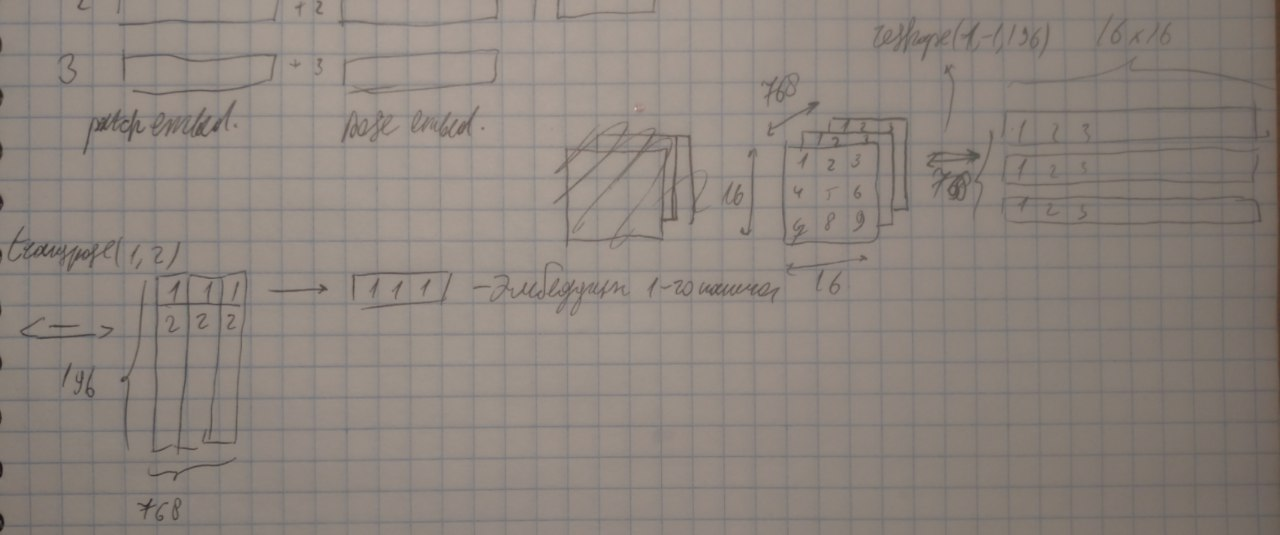

In [14]:
t = torch.FloatTensor([
    [[111, 112, 113, 114],
    [121, 122, 123, 124],
    [131, 132, 133, 134],
    [141, 142, 143, 144]],

    [[211, 212, 213, 214],
    [221, 222, 223, 224],
    [231, 232, 233, 234],
    [241, 242, 243, 244]],

    [[311, 312, 313, 314],
    [321, 322, 323, 324],
    [331, 332, 333, 334],
    [341, 342, 343, 344]],
])
t.shape

print(t.reshape(1, -1, 16))
print(t.reshape(1, -1, 16).transpose(1, 2))
print(t.reshape(1, -1, 3))
print(t.reshape(1, 16, -1))

tensor([[[111., 112., 113., 114., 121., 122., 123., 124., 131., 132., 133.,
          134., 141., 142., 143., 144.],
         [211., 212., 213., 214., 221., 222., 223., 224., 231., 232., 233.,
          234., 241., 242., 243., 244.],
         [311., 312., 313., 314., 321., 322., 323., 324., 331., 332., 333.,
          334., 341., 342., 343., 344.]]])
tensor([[[111., 211., 311.],
         [112., 212., 312.],
         [113., 213., 313.],
         [114., 214., 314.],
         [121., 221., 321.],
         [122., 222., 322.],
         [123., 223., 323.],
         [124., 224., 324.],
         [131., 231., 331.],
         [132., 232., 332.],
         [133., 233., 333.],
         [134., 234., 334.],
         [141., 241., 341.],
         [142., 242., 342.],
         [143., 243., 343.],
         [144., 244., 344.]]])
tensor([[[111., 112., 113.],
         [114., 121., 122.],
         [123., 124., 131.],
         [132., 133., 134.],
         [141., 142., 143.],
         [144., 211., 212.],
       

In [15]:
class PatchEmbedding(nn.Module):
    """ Image to Patch Embedding
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()

        self.img_size = (img_size, img_size)
        self.patch_size = (patch_size, patch_size)

        self.num_patches = (self.img_size[0] // self.patch_size[0]) * (
            self.img_size[1] // self.patch_size[1]
        )

        self.patch_embeddings = nn.Conv2d(in_chans, embed_dim, patch_size, patch_size)

    def forward(self, image):

        B, C, H, W = image.shape

        assert H == self.img_size[0] and W == self.img_size[1]

        patches = self.patch_embeddings(image).flatten(2).transpose(1, 2)

#         print(patches.shape)
        
        return patches

In [16]:
patch_embed = PatchEmbedding()
x = torch.randn(1, 3, 224, 224)
patch_embed(x).shape

torch.Size([1, 196, 768])

![](https://amaarora.github.io/images/vit-03.png)

К эмбеддингам патчей (матрица Bx196x768, всего 196 патчей, каждый из которых кодируется вектором размерности 768) конкатенируется вектор 1x768, представляющий собой эмбеддинг (токен) класса. Поскольку мы хотим настроить токен во время обучения для отображения класса, из вектора создаётся nn.Parameter. К полученному тензору прибавляются позиционные эмбеддинги, хранящие информацию о расположении патчей друг относительно друга.

## Часть 2. Transformer Encoder

![](https://amaarora.github.io/images/ViT.png)

Основная идея self-attention модуля состоит в том, что для каждого из эмбеддингов создаются запрос, ключ и значение, которые затем участвуют в создании нового эмбеддинга на основе старого, учитывая его взаимосвязь с другими эмбеддингами. 
Поскольку мы имеем дело с MHA, нам для каждого эмбеддинга требуется несколько Q, K, V.
На вход полносвязной сети поступает эмбеддинг в виде вектора длины 768, который преобразуется в вектор 3x768 = 2304. Эти три части длиной 768 каждая относятся к запросу, ключу и значению. Вектор преобразуется в тезнор 3x12x64. Первая размерность - слои запросов, ключей и значений. Всего составлено по 12 запросов, ключей и значений длиной 64 каждый (то есть у Multi-Head Attention в данном случае 12 "голов").

![](https://amaarora.github.io/images/vit-07.png)

In [17]:
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features=3072, out_features=768, drop=0.):
        super().__init__()
        
#         print(in_features, hidden_features, out_features)
        
        # Linear Layers
        self.seq = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.GELU(),
            nn.Linear(hidden_features, out_features),
            nn.GELU(),
            nn.Dropout(drop)
        )


    def forward(self, x):
        
        x = self.seq(x)

        return x

In [18]:
x = torch.randn(1, 197,768)
mlp = MLP(768, 3072, 768)
out = mlp(x)
out.shape

torch.Size([1, 197, 768])

In [19]:
t = torch.FloatTensor([
    [[111, 112, 113],
    [121, 122, 123],
    [131, 132, 133]],

    [[211, 212, 213],
    [221, 222, 223],
    [231, 232, 233]],

    [[311, 312, 313],
    [321, 322, 323],
    [331, 332, 333]],
])
t.shape

torch.Size([3, 3, 3])

In [20]:
torch.cat([t, torch.rand(1, 1, t.shape[-1]).expand(t.shape[0], -1, -1) * 100], dim=1)

tensor([[[111.0000, 112.0000, 113.0000],
         [121.0000, 122.0000, 123.0000],
         [131.0000, 132.0000, 133.0000],
         [ 10.5491,  48.1869,  38.3643]],

        [[211.0000, 212.0000, 213.0000],
         [221.0000, 222.0000, 223.0000],
         [231.0000, 232.0000, 233.0000],
         [ 10.5491,  48.1869,  38.3643]],

        [[311.0000, 312.0000, 313.0000],
         [321.0000, 322.0000, 323.0000],
         [331.0000, 332.0000, 333.0000],
         [ 10.5491,  48.1869,  38.3643]]])

In [21]:
t_exp = torch.arange(0, 5)
t_exp = t_exp.view(1, 1, 5)
t_exp

tensor([[[0, 1, 2, 3, 4]]])

In [22]:
t_exp.expand([3, 2, -1])

tensor([[[0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]],

        [[0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]],

        [[0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]]])

In [23]:
t_r = torch.rand(size=(197, 3, 12, 64))
t_r0, t_r1, t_r2 = t_r.unbind(dim=-3)
t_r0.shape

torch.Size([197, 12, 64])

In [24]:
class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, qkv_bias=False, attn_drop=0., out_drop=0.):
        super().__init__()
        self.num_heads = num_heads  # Кол-во "голов" MHA
        # dim - длина эмбеддинга
        head_dim = dim // num_heads  # Длина запроса, ключа, и значения
        self.head_dim = head_dim
        self.scale = head_dim ** -0.5  # Коэффициент нормализации коэффициентов значимости

        self.qkv = nn.Linear(in_features=dim, out_features=3 * dim, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.out = nn.Linear(in_features=dim, out_features=dim)
        self.out_drop = nn.Dropout(out_drop)

    def forward(self, x):
        
        # Attention
        x = self.qkv(x)
        x = self.attn_drop(x)
        x = x.view(x.shape[0], -1, 3, self.num_heads, self.head_dim)

        q, k, v = x.transpose(-2, -4).unbind(dim=-3)
        x = nn.functional.softmax(q @ k.transpose(-1, -2) * self.scale, dim=-1) @ v
#         x = x.transpose(-2, -3).reshape(B, -1, self.head_dim * self.num_heads)
        x = x.transpose(-2, -3).flatten(start_dim=-2)
        
        x = self.out(x)
        x = self.out_drop(x)

        return x


![](https://amaarora.github.io/images/vit-08.png)

In [25]:
# attn = (q @ k.transpose(-2, -1)) * self.scale
# attn = attn.softmax(dim=-1)

In [26]:
x = torch.randn(1, 197, 768)
attention = Attention(768, 8)
out = attention(x)
out.shape

torch.Size([1, 197, 768])

In [27]:
import math


class Block(nn.Module):
    def __init__(self, dim, num_heads=8, mlp_ratio=4, drop_rate=0.):
        super().__init__()

        # Normalization
        self.input_norm = nn.LayerNorm(dim)

        # Attention
        self.mha = Attention(dim, num_heads, attn_drop=drop_rate, out_drop=drop_rate)

        # Dropout
        self.drop = nn.Dropout(drop_rate)

        # Normalization
        self.out_norm = nn.LayerNorm(dim)

        # MLP
        self.mlp = MLP(dim, math.ceil(dim * mlp_ratio), dim, drop_rate)
                

    def forward(self, x):
        # Attetnion
        x_mha = self.input_norm(x)
        x_mha = self.mha(x_mha)
        x_mha = x_mha + x
        
        # MLP
        x_mlp = self.out_norm(x_mha)
        x_mlp = self.mlp(x_mlp)
        x = x_mlp + x_mha
        
        return x

In [28]:
x = torch.randn(1, 197, 768)
block = Block(768, 8)
out = attention(x)
out.shape

torch.Size([1, 197, 768])

В оригинальной реализации теперь используется [DropPath](https://github.com/rwightman/pytorch-image-models/blob/e98c93264cde1657b188f974dc928b9d73303b18/timm/layers/drop.py)

In [29]:
class Transformer(nn.Module):
    def __init__(self, depth, dim, num_heads=8, mlp_ratio=4, drop_rate=0.):
        super().__init__()
        self.blocks = nn.ModuleList([
            Block(dim, num_heads, mlp_ratio, drop_rate)
            for i in range(depth)])

    def forward(self, x):
        for block in self.blocks:
            x = block(x)
        return x

In [30]:
x = torch.randn(1, 197, 768)
block = Transformer(12, 768)
out = attention(x)
out.shape

torch.Size([1, 197, 768])

![](https://amaarora.github.io/images/vit-06.png)

In [31]:
def get_positional_encoding(n_embed, embed_dim):
    pos_enc = torch.zeros((1, n_embed, embed_dim))
    posits = torch.arange(0, n_embed).view(-1, 1)
#     freqs = torch.exp(torch.arange(0, embed_dim, 2) * (-math.log(10000.0) / embed_dim))
    freqs = 1 / 10000 ** (2 * torch.arange(0, embed_dim, 2) / embed_dim)

    pos_enc[:, :, 0::2] = torch.sin(posits * freqs)
    pos_enc[:, :, 1::2] = torch.cos(posits * freqs)
    
    
    return pos_enc

In [32]:
from torch.nn.modules.normalization import LayerNorm

class ViT(nn.Module):
    """ Vision Transformer with support for patch or hybrid CNN input stage
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, num_classes=1000,
                 embed_dim=768, depth=12, num_heads=12, mlp_ratio=4., 
                 qkv_bias=False, drop_rate=0.,):
        super().__init__()

        # Присвоение переменных
        assert(embed_dim % num_heads == 0)

        # Path Embeddings, CLS Token, Position Encoding
        self.patch_embeddings = PatchEmbedding(img_size, patch_size, in_chans, embed_dim)
        self.cls_token = nn.Parameter(torch.rand(1, 1, embed_dim))
#         self.pos_encoding = nn.Parameter(torch.rand(1, self.patch_embeddings.num_patches + 1, embed_dim))
        self.pos_encoding = nn.Parameter(get_positional_encoding(self.patch_embeddings.num_patches + 1, embed_dim), requires_grad=False)
        print(self.pos_encoding.shape)
        # Transformer Encoder
        self.transformer = Transformer(depth, embed_dim, num_heads, mlp_ratio, drop_rate)

        # Classifier
        self.classifier = MLP(embed_dim, math.ceil(embed_dim * mlp_ratio), num_classes, drop_rate)

    def forward(self, x):
        B = x.shape[0]
      
        # Path Embeddings, CLS Token, Position Encoding
        x = self.patch_embeddings(x)
        
        cls_token = self.cls_token.expand(B, -1, -1)
#         print(cls_token.shape, x.shape)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_encoding
#         print(x.shape)

        # Transformer Encoder
        x = self.transformer(x)

        # Classifier
        x = self.classifier(x[:, 0])

        return x

In [33]:
# x = torch.randn(5, 3, 224, 224)
# vit = ViT()
# out = vit(x)
# out.shape

# Домашнее задание


1. Выбрать датасет для классификации изображений с размерностью 64x64+ 
2. Обучить ViT на таком датасете.
3. Попробовать поменять размерности и посмотреть, что поменяется при обучении.


Примечание:
- Датасеты можно взять [тут](https://pytorch.org/vision/stable/datasets.html#built-in-datasets) или найти в другом месте.
- Из за того, что ViT учится медленно, количество примеров в датасете можно ограничить до 1к-5к.

In [34]:
import random
import numpy as np
from pytorch_lightning import seed_everything


def set_random_seed(s):
    random.seed(s)
    np.random.seed(s)
    torch.manual_seed(s)
    seed_everything(s, workers=True)

In [35]:
import wandb
# from kaggle_secrets import UserSecretsClient
#
#
# user_secrets = UserSecretsClient()
# api_key = user_secrets.get_secret("wandb-api-key")
#
# wandb.login(anonymous='allow', key=api_key)

wandb.login(anonymous='allow')

wandb: Currently logged in as: technumber. Use `wandb login --relogin` to force relogin


True

In [36]:
from __future__ import annotations
from typing import Union, Optional
from torch import optim
import os.path


class Logger:
    def __init__(
            self,
            model: nn.Module,
            img_size: Union[int, list[int, int], tuple[int, int]],
            epochs: int,
            train_batch_size: int,
            loss: Optional[nn.Module] = None,
            optimizer: Optional[optim.Optimizer] = None,
            **kwargs
    ) -> None:
        model_name = str(type(model))
        model_name = model_name[model_name.rfind('.') + 1:-2]

        self.config = {
            'model': model_name,
            'img_size': (img_size, img_size) if isinstance(img_size, int) else img_size,
            'epochs': epochs,
            'train_batch_size': train_batch_size,
            **kwargs
        }

        if loss:
            loss_name = str(type(loss))
            loss_name = loss_name[loss_name.rfind('.') + 1:-2]
            self.config['loss'] = loss_name

        if optimizer:
            opt_name = str(type(optimizer))
            opt_name = opt_name[opt_name.rfind('.') + 1:-2]
            self.config['optimizer'] = opt_name
            opt_params = optimizer.state_dict()['param_groups'][0]
            if 'lr' in opt_params.keys():
                self.config['learning_rate'] = opt_params['lr']
            self.config['optimizer_params'] = {
                k: v for k, v in opt_params.items() if k not in ['params', 'lr'] and v is not None
            }

        if not os.path.exists('./wandb_runs'):
            os.mkdir('./wandb_runs')
        # TODO: .env
        self.run = wandb.init(
            dir='./wandb_runs',
            project="ViT_GTSRB_classification",
            anonymous='allow',
            config=self.config
        )

    def watch(self, model: nn.Module):
        self.run.watch(model)

    def log(self, metrics: dict):
        self.run.log(metrics)

    def finish(self):
        self.run.finish()
        
    def save_model(self, model):
        trained_model_artifact = wandb.Artifact(
            self.config['model'], type='model',
            description=f"trained {self.config['model']}"
        )
        
        PATH = f"./models/{self.config['model']}_{self.run.name}/"
        
        if not os.path.exists(PATH):
            os.makedirs(PATH)
        
        
        
        torch.save(
            model.state_dict(),
            PATH + 'model_state_dict.pth'
        )
        
        trained_model_artifact.add_dir(PATH)
        self.run.log_artifact(trained_model_artifact)

In [37]:
class EarlyStopper:
    def __init__(self, objective='min', patience=1, delta=0):
        assert(objective in ['min', 'max'])
        
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_metric = None
        self.is_minimization = objective=='min'

    def is_early_stop(self, metric):
        if self.best_metric is None or (metric < self.best_metric and self.is_minimization) or (metric > self.best_metric and not self.is_minimization):
            self.best_metric = metric
            self.counter = 0
        elif (metric >= (self.best_metric + self.delta) and self.is_minimization) or (metric <= (self.best_metric - self.delta) and not self.is_minimization):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [38]:
import numpy as np
from torch.nn.functional import softmax


def test(model,
         loss,
         data_test,
         acc=None,
         logger=None,
         device=torch.device('cpu')):
    loss_value_list = []
    if acc:
        acc_value_list = []
    model.eval()
    with torch.inference_mode():
        for batch_data in data_test:
            test_img = batch_data[0].to(device)
            test_label = batch_data[1].to(device)

            pred_label = model(test_img)

            loss_value = loss(pred_label, test_label).item()
            if acc:
                acc_value = acc(pred_label, test_label).item()
            
            loss_value_list.append(loss_value)
            if acc:
                acc_value_list.append(acc_value)

    return np.average(loss_value_list), np.average(acc_value_list) if acc else None

In [39]:
def train(model,
          data_train,
          data_test,
          loss,
          optimizer,
          epochs,
          acc=None,
          logger=None,
          early_stopper=None,
          device=torch.device('cpu')):
    model.to(device)

    if logger:
        logger.watch(model)
    wandb.define_metric("train/loss", summary="min")
    wandb.define_metric("test/loss", summary="min")
    if acc:
        wandb.define_metric("train/acc", summary="max")
        wandb.define_metric("test/acc", summary="max")
    
    model.train()
    for epoch in range(epochs):
        batch_train_loss_list = []
        if acc:
            batch_train_acc_list = []
        for batch_data in data_train:
            model.zero_grad()

            train_img = batch_data[0].to(device)
            train_label = batch_data[1].to(device)

            pred_label = model(train_img)
            
            loss_value = loss(pred_label, train_label)
            
            if acc:
                batch_train_acc_list.append(acc(pred_label, train_label).item())
            batch_train_loss_list.append(loss_value.item())
                
            loss_value.backward()

            optimizer.step()

        test_loss_value, test_acc_value = test(model, loss, data_test, acc, logger, device)
        
        if logger:
            train_loss_value = np.average(batch_train_loss_list)
            log_dict = {
                'train/loss': train_loss_value,
                'test/loss': test_loss_value,
                'epoch': epoch
            }
            if acc:
                train_acc_value = np.average(batch_train_acc_list)
                log_dict.update({
                    'train/acc': train_acc_value,
                    'test/acc': test_acc_value,
                })   
            logger.log(log_dict)
            
        if early_stopper and early_stopper.is_early_stop(test_acc_value):
            print('Run was early stopped.')
            break

    logger.save_model(model)
        
    logger.finish()

In [40]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

SUBSET_LENGTH = 1500
N_CLASSES = 43
# INIT_WEIGHT_PATH = 'kaggle/models/weights/___.pth'
ALPHA = 0.000001
IMAGE_SIZE = 224
EPOCHS = 20
TRAIN_BATCH_SIZE = 50
TEST_BATCH_SIZE = 50
DEPTH = 6
N_HEADS = 6
DROP_RATE = 0.2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

img_tform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

data_train = Subset(
    datasets.GTSRB('./data/GTSRB/', split='train', download=True, transform=img_tform),
    torch.arange(SUBSET_LENGTH)
)
data_train_loader = DataLoader(
    data_train,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

data_test = Subset(
    datasets.GTSRB('./data/GTSRB/', split='test', download=True, transform=img_tform),
    torch.arange(SUBSET_LENGTH)
)
data_test_loader = DataLoader(
    data_test,
    batch_size=TEST_BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [41]:
from torch.nn import CrossEntropyLoss
from torchmetrics import F1Score

set_random_seed(17)

model = ViT(
    img_size=IMAGE_SIZE,
    num_classes=N_CLASSES,
    depth=DEPTH,
    num_heads=N_HEADS,
    drop_rate=DROP_RATE,
).to(device)
# if os.path.isfile(INIT_WEIGHT_PATH):
#     model.load_state_dict(torch.load(INIT_WEIGHT_PATH))
# else:
#     print("Weights not found.")
optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)
loss = CrossEntropyLoss().to(device)
acc = F1Score(task="multiclass", num_classes=N_CLASSES, top_k=1).to(device)

logger = Logger(
    model,
    IMAGE_SIZE,
    EPOCHS,
    TRAIN_BATCH_SIZE,
    loss=loss,
    optimizer=optimizer,
    depth = DEPTH,
    n_heads = N_HEADS,
    drop_rate = DROP_RATE,
    dataset='GTSRB'
)

early_stopper = EarlyStopper(objective='max', patience=7, delta=0.)

train(
    model=model,
    data_train=data_train_loader,
    data_test=data_test_loader,
    loss=loss,
    acc=acc,
    optimizer=optimizer,
    epochs=EPOCHS,
    logger=logger,
    early_stopper=early_stopper,
    device=device
)

Global seed set to 17


torch.Size([1, 197, 768])


wandb: Adding directory to artifact (./models/ViT_proud-firefly-30)... 

Run was early stopped.


Done. 0.7s


epoch,▁▂▃▄▅▆▇█
test/acc,█▁▁▁▁▁▁▁
test/loss,▁▂▄▅▆▇▇█
train/acc,▁███████
train/loss,█▄▂▂▁▁▁▁
epoch,7


In [42]:
torch.cuda.empty_cache()